<a href="https://colab.research.google.com/github/MartyWeissman/MiscMath/blob/main/DiophApprox_BangBuck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp
import pandas as pd

In [150]:
mp.dps = 500 # Digits of precision.

In [151]:
print(mp.pi)  # Check that it works.
print(mp.sqrt(2))
print(mp.e)

3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491
1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727350138462309122970249248360558507372126441214970999358314132226659275055927557999505011527820605714701095599716059702745345968620147285174186408891986095523292304843087143214508397626036279952514079896872533965463318088296406206152583523950547457502877599617298355752203375318570113543746034084988471603868999706990048150305440277903164542478230684929369186215805784631115966687130130156185689872

In [152]:
def bangbuck(p,q,x):
  ratl = mp.mpf(p) / mp.mpf(q)
  acc = mp.fabs(ratl - x)
  buck = mp.log10(q)
  bang = -mp.log10(acc)
  return bang,buck

In [153]:
bangbuck(314,100,mp.pi)

(mpf('2.7978786751726633239470487288964005983770774322817581659357683437997898340977303702328131594328245579626338444052311510456393576664938013091871823070502987771866961290261033711771358476787487968690983180257260512426686641059928299627829926795225207951377850704254999486740673343147950204599166073281392039254858809294993531105461530140188912201853248482791147256725316803300511254011562598731794900612500525712356206255151296681553238420060166688144649838270884171368973564417251471543479389901520492046'),
 mpf('2.0'))

In [154]:
def contfrac(x, num_terms=50):
  alist = [0] * num_terms
  curr_x = x
  for t in range(num_terms):
    a_new = mp.floor(curr_x)
    curr_x = mp.mpf(1.0) / (curr_x - a_new)
    alist[t] = int(a_new)
  plist = [0] * num_terms
  qlist = [0] * num_terms
  plist[0] = alist[0]
  qlist[0] = 1
  plist[1] = alist[0]*alist[1] + 1
  qlist[1] = alist[1]
  for t in range(2,num_terms):
    plist[t] = alist[t] * plist[t-1] + plist[t-2]
    qlist[t] = alist[t] * qlist[t-1] + qlist[t-2]
  rlist = [0] * num_terms
  for t in range(num_terms):
    rlist[t] = mp.mpf(plist[t]) / mp.mpf(qlist[t])
  return alist, plist, qlist, rlist

In [155]:
def decfrac(x, num_terms = 50):
  plist = [0] * num_terms
  qlist = [0] * num_terms
  rlist = [0] * num_terms
  for t in range(num_terms):
    plist[t] = int(mp.floor(x * (10**t)))
    qlist[t] = 10**t
    rlist[t] = mp.mpf(plist[t]) / mp.mpf(qlist[t])
  return plist, qlist, rlist

In [156]:
p,q,r = decfrac(mp.pi)

In [157]:
import seaborn as sns

In [174]:
def bbplot(x, buck_max = 50, title_num = ''):
  '''
  plots bang/buck for rational approximations from continued fraction and from decimal expansion.

  '''
  dec_terms = buck_max
  cf_terms = buck_max * 3
  dec_rows = ['dec_row_{}'.format(j) for j in range(dec_terms)]
  cf_rows = ['cf_row_{}'.format(j) for j in range(cf_terms)]
  plot_df = pd.DataFrame(columns = ['buck','bang','type','p','q'], index=cf_rows + dec_rows)
  a,p,q,r = contfrac(x,num_terms=cf_terms)
  for j in range(cf_terms):
    bang,buck = bangbuck(p[j], q[j], x)
    plot_df.loc['cf_row_{}'.format(j)] = [buck, bang, 'continued frac', p[j], q[j]]
  p,q,r = decfrac(x, num_terms=dec_terms)
  for j in range(dec_terms):
      bang,buck = bangbuck(p[j], q[j], x)
      plot_df.loc['dec_row_{}'.format(j)] = [buck, bang, 'decimal frac', p[j], q[j]]
  plot_df = plot_df[plot_df['buck'] <= buck_max]

  fig,ax = plt.subplots(1,1,figsize=(6,4))
  x_range = np.arange(dec_terms)
  sns.lineplot(x=x_range, y=2*x_range, color='steelblue', alpha=0.5)
  sns.lineplot(x=x_range, y=x_range, color='orange', alpha=0.3)

  sns.scatterplot(x='buck', y='bang', data=plot_df, hue='type', linewidth=0, s=5)

  ax.text(25,60,'Bang = 2 Buck', rotation=35)
  ax.text(25,30,'Bang = Buck', rotation=20)
  ax.set_xlabel('Buck = $log_{10}(denominator)$')
  ax.set_ylabel('Bang = $-log_{10}(| error |)$')
  plt.suptitle('Bang-buck plot for '+title_num)
  plt.show()
  return plot_df

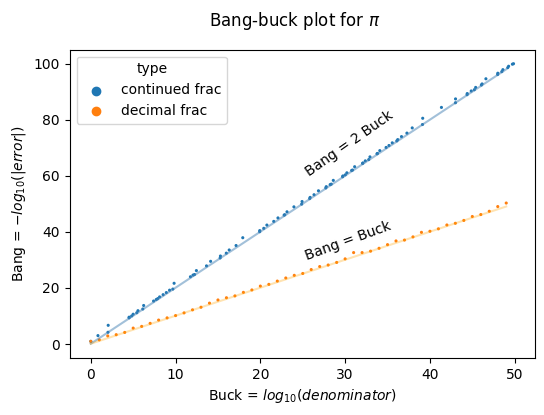

In [175]:
p_df = bbplot(mp.pi, title_num='$\pi$')

In [173]:
p_df.loc['cf_row_45']

buck    25.8174641327919743237669165965297347948685235...
bang    51.8274546609997370181585750050613902455705306...
type                                       continued frac
p                             206354529198815139329998250
q                              65684686702784555831515951
Name: cf_row_45, dtype: object

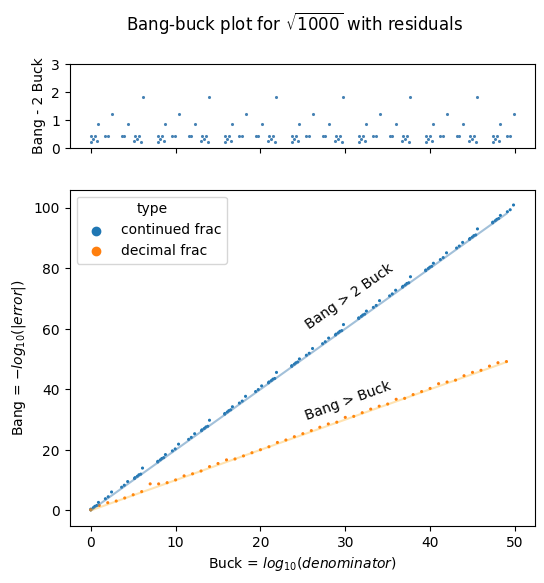

In [183]:
bbplot_res(mp.sqrt(1000), title_num='$\sqrt{1000}$')

In [178]:
def bbplot_res(x, buck_max = 50, title_num = ''):
  '''
  plots bang/buck for rational approximations from continued fraction and from decimal expansion.

  '''
  dec_terms = buck_max
  cf_terms = buck_max * 3
  dec_rows = ['dec_row_{}'.format(j) for j in range(dec_terms)]
  cf_rows = ['cf_row_{}'.format(j) for j in range(cf_terms)]
  plot_df = pd.DataFrame(columns = ['buck','bang','type','p','q', 'res'], index=cf_rows + dec_rows)
  a,p,q,r = contfrac(x,num_terms=cf_terms)
  for j in range(cf_terms):
    bang,buck = bangbuck(p[j], q[j], x)
    res = bang - 2*buck
    plot_df.loc['cf_row_{}'.format(j)] = [buck, bang, 'continued frac', p[j], q[j], res]
  p,q,r = decfrac(x, num_terms=dec_terms)
  for j in range(dec_terms):
      bang,buck = bangbuck(p[j], q[j], x)
      res = bang - 2*buck
      plot_df.loc['dec_row_{}'.format(j)] = [buck, bang, 'decimal frac', p[j], q[j], res]
  plot_df = plot_df[plot_df['buck'] <= buck_max]

  fig,ax = plt.subplots(2,1,figsize=(6,6), height_ratios=[1, 4], sharex=True)
  x_range = np.arange(dec_terms)

  sns.lineplot(x=x_range, y=2*x_range, color='steelblue', alpha=0.5, ax=ax[1])
  sns.lineplot(x=x_range, y=x_range, color='orange', alpha=0.3, ax=ax[1])
  sns.scatterplot(x='buck', y='bang', data=plot_df, hue='type', linewidth=0, s=5, ax=ax[1])

  sns.scatterplot(x='buck', y='res', data=plot_df[plot_df['type'] == 'continued frac'],
                  color='steelblue', ax=ax[0], s=5, linewidth=0)
  ax[0].set_ylabel('Bang - 2 Buck')
  ax[0].set_ylim(0,3)
  ax[1].text(25,60,'Bang > 2 Buck', rotation=35)
  ax[1].text(25,30,'Bang > Buck', rotation=20)
  ax[1].set_xlabel('Buck = $log_{10}(denominator)$')
  ax[1].set_ylabel('Bang = $-log_{10}(| error |)$')
  plt.suptitle('Bang-buck plot for '+title_num+' with residuals', y=0.97)
  plt.show()
  return None #plot_df

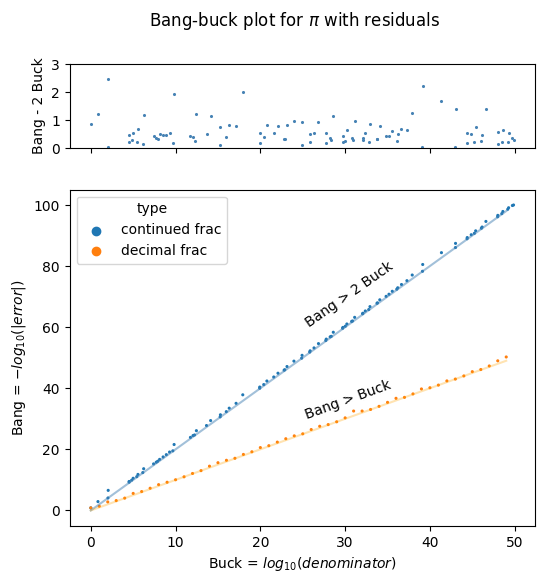

In [179]:
bbplot_res(mp.pi, title_num='$\pi$')

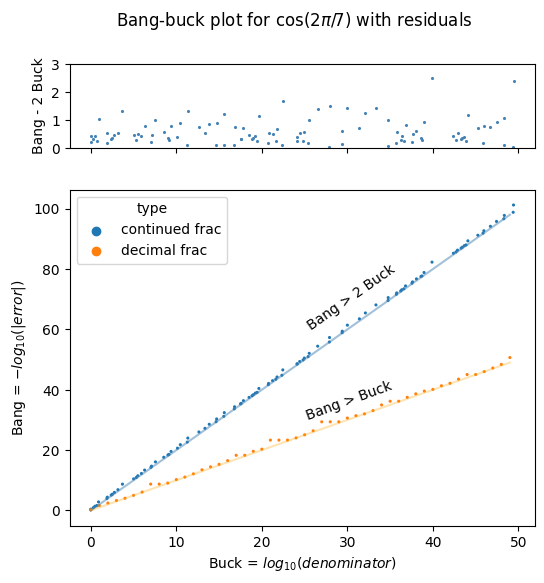

In [180]:
bbplot_res(mp.cos(2*mp.pi/7), title_num='$\cos(2 \pi / 7)$')

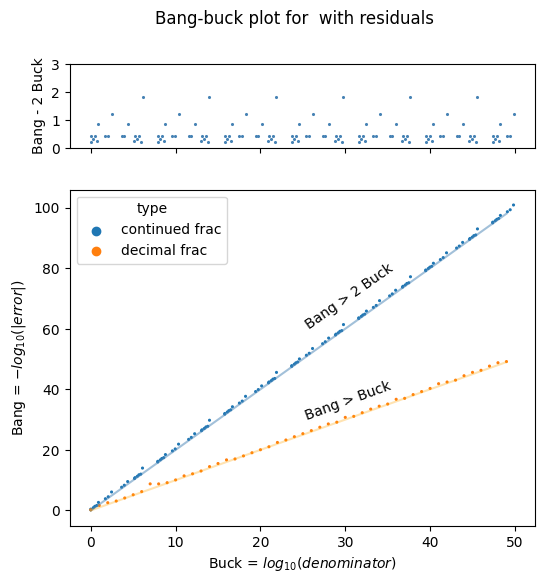

In [184]:
bbplot_res(mp.sqrt(1000))

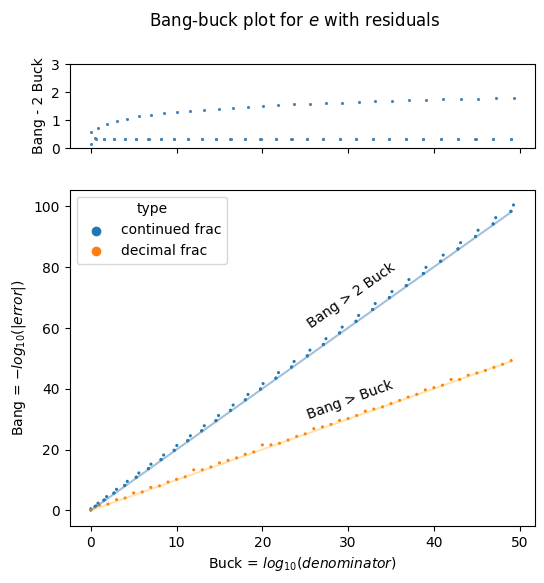

In [182]:
bbplot_res(mp.e, title_num = '$e$')